# ✨ Introduction

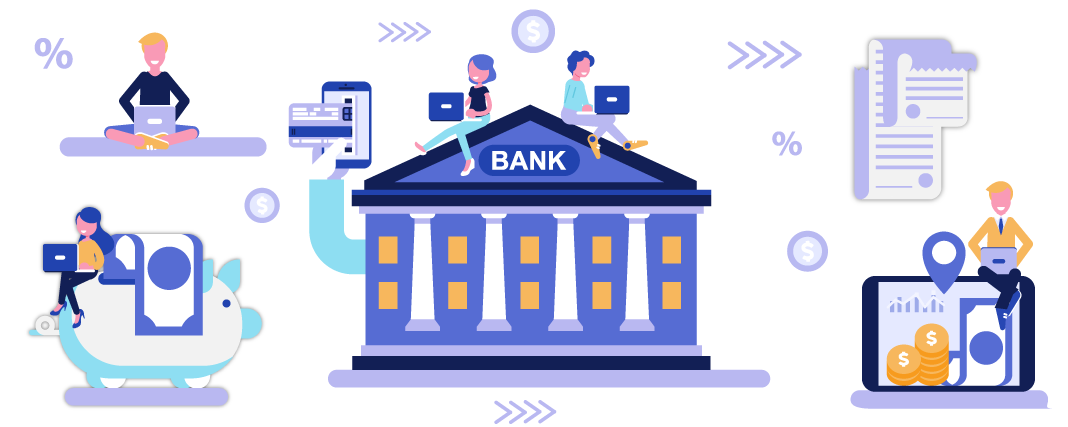

🏦 **Dataset:** A bank is investigating a very high rate of customer leaving the bank. Here is a 10.000 records dataset to investigate and predict which of the customers are more likely to leave the bank soon.

**Columns:**
* RowNumber
* CustomerId
* Surname
* CreditScore
* Geography
* Gender
* Age
* Tenure
* Balance
* NumOfProducts
* HasCrCard
* IsActiveMember
* EstimatedSalary
* Exited


📌 **In this notebook, we will predict customer churn using Artificial Neural Network (ANN).**

<font color= 'blue'>
Content:

1. [Load and Check Data](#1)
1. [Data Visualization](#2)
1. [Feature Engineering](#3)
    * [Age -> Categorical Age](#4)
    * [CreditScore -> Categorical CreditScore](#5)
1. [Modeling](#6)
    * [Train - Test Split](#7)
    * [Standardization](#8)
    * [Artificial Neural Network (ANN)](#9)

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<a id='1'></a><br>
# Load and Check Data

In [ ]:
data = pd.read_csv("/kaggle/input/deep-learning-az-ann/Churn_Modelling.csv")

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.info()

* No nan value.

In [ ]:
data.iloc[:,0:13].head().describe().T

<a id='2'></a><br>
# Data Visualization

In [ ]:
sns.countplot(x = "Exited", data = data)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))   
sns.heatmap(data.corr(), annot = True , fmt=".2f",ax=ax ,cmap = "Blues")
plt.show()

In [ ]:
sns.pairplot(data, hue="Exited")
plt.show()

In [ ]:
plt.boxplot(data["Age"])
plt.show()

In [ ]:
plt.boxplot(data["Balance"])
plt.show()

In [ ]:
plt.boxplot(data["CreditScore"])
plt.show()

In [ ]:
sns.countplot(x = "NumOfProducts", data = data)
plt.show()

<a id='3'></a><br>
# Feature Engineering

In [ ]:
data = pd.get_dummies(data, columns= ["Geography"])
data = pd.get_dummies(data, columns= ["Gender"])
data = pd.get_dummies(data, columns= ["NumOfProducts"])
data.head()

* get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.

<a id='4'></a><br>
### Age -> Categorical Age

In [ ]:
print("Max age: ", data['Age'].max())
print("Min age: ", data['Age'].min())

In [ ]:
age_cat = [0 if i < 38 else 1 if i <42  else 2 if i < 45 else 3 if i < 60 else 4 for i in data["Age"]]
data["Age_Cat"] = age_cat

In [ ]:
sns.countplot(x = "Age_Cat", data = data)
plt.show()

In [ ]:
g = sns.factorplot(x = "Age_Cat", y = "Exited", data = data, kind = "bar")
g.set_ylabels("Exited")
plt.show()

In [ ]:
data["Age_Cat"] = data["Age_Cat"].astype("category")
data = pd.get_dummies(data, columns=["Age_Cat"])
data.head(10)

<a id='5'></a><br>
### CreditScore-> Categorical CreditScore

In [ ]:
print("Max age: ", data['CreditScore'].max())
print("Max age: ", data['CreditScore'].min())
print("Mean age: ", data['CreditScore'].mean())

In [ ]:
credit_cat = [0 if i < 450 else 1 if i <670  else 2 for i in data["CreditScore"]]
data["CreditScore_Cat"] = credit_cat

In [ ]:
sns.countplot(x = "CreditScore_Cat", data = data)
plt.show()

In [ ]:
g = sns.factorplot(x = "CreditScore_Cat", y = "Exited", data = data, kind = "bar")
g.set_ylabels("Exited")
plt.show()

In [ ]:
data["CreditScore_Cat"] = data["CreditScore_Cat"].astype("category")
data = pd.get_dummies(data, columns=["CreditScore_Cat"])
data.head(10)

* Drop non-necessary row -> RowNumber, CustomerId
* Drop object data type -> Surname
* Drop no longer necessary row -> CreditScore, Age

In [ ]:
data.drop(labels = ["RowNumber", "CustomerId","Surname","CreditScore","Age"], axis = 1, inplace = True) 
data.head()

* Drop rows that have correlation value = 0.01 with Exited.

In [ ]:
data.drop(labels = ["Tenure", "HasCrCard","EstimatedSalary"], axis = 1, inplace = True)
data.head()

<a id='6'></a><br>
# Modeling

In [ ]:
x_data = data.drop(["Exited"],axis=1)
y_data = data["Exited"].values

<a id='7'></a><br>
## Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size = 0.33,random_state=42)

<a id='8'></a><br>
## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns.values)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns.values)

In [ ]:
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

<a id='9'></a><br>
## Artificial Neural Network (ANN)

In [ ]:
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library

classifier=Sequential()
classifier.add(Dense(10, activation = 'relu' , input_dim = x_train.shape[1])),
classifier.add(Dense(8 , activation = 'relu')),
classifier.add(Dense(1 , activation = 'sigmoid'))


classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(x_train, y_train, batch_size = 25, epochs = 100,verbose = 1)

In [ ]:
# Predicting on train data
y_pred = classifier.predict(x_train)
score, acc = classifier.evaluate(x_train, y_train,batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc*100)

In [ ]:
y_pred = (y_pred > 0.5)*1

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_train,y_pred)

sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap='Blues')
plt.show()

In [ ]:
# Predicting on test data
y_pred = classifier.predict(x_test)
score, acc = classifier.evaluate(x_test, y_test,batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc*100)

In [ ]:
y_pred = (y_pred > 0.5)*1

cf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap='Blues')
plt.show()

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()